<a href="https://colab.research.google.com/github/inayath-m/playground/blob/master/71_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2018-06-02 05:43:17--  https://raw.githubusercontent.com/JaeDukSeo/sample_data/master/aapl.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299854 (293K) [text/plain]
Saving to: ‘aapl.csv.2’

aapl.csv.2          100%[===================>] 292.83K  --.-KB/s    in 0.05s   

2018-06-02 05:43:17 (6.34 MB/s) - ‘aapl.csv.2’ saved [299854/299854]



/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:375: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:376: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



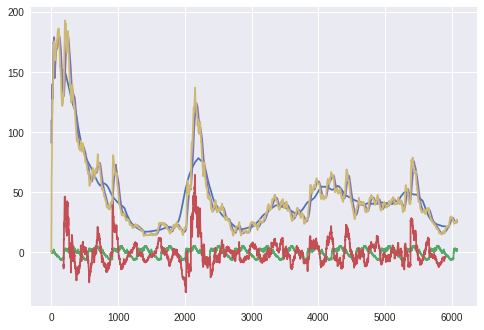

In [0]:
!wget https://raw.githubusercontent.com/JaeDukSeo/sample_data/master/aapl.csv
 
import pandas as pd

import pandas as pd
import numpy as np,sys
import tensorflow as tf
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

import matplotlib.pyplot as plt
from numpy import newaxis

# 0. Get the Data and simple sorting and check NaN
df = pd.read_csv('aapl.csv',delimiter=',',usecols=['Date','Open','High','Low','Close'])
df.Date = pd.to_datetime(df.Date)
df['Mean'] = (df.High + df.Low )/2.0



from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.Mean.values, freq=365) 
trace1 = go.Scatter(
    x = df.Date,y = decomposition.trend,
    name = 'Trend',mode='line'
)
trace2 = go.Scatter(
    x = df.Date,y = decomposition.seasonal,
    name = 'Seasonal',mode='line'
)
trace3 = go.Scatter(
    x = df.Date,y = decomposition.resid,
    name = 'Residual',mode='line'
)
trace4 = go.Scatter(
    x = df.Date,y = df.Mean,
    name = 'Mean Stock Value',mode='line'
)


# a. Standard Average of Window
Mean_list = list(df.Mean)
window_size = 50
N = len(Mean_list)
std_avg_predictions = list(Mean_list[:window_size])
for pred_idx in range(window_size,N):
    std_avg_predictions.append(np.mean(Mean_list[pred_idx-window_size:pred_idx]))

# b. EXP Average of Window
window_size = 100
run_avg_predictions = []
running_mean = 0.0
run_avg_predictions.append(running_mean)
decay = 0.8

for pred_idx in range(1,N):
    running_mean = running_mean*decay + (1.0-decay)*Mean_list[pred_idx-1]
    run_avg_predictions.append(running_mean)

trace5 = go.Scatter(
    x = df.Date,y = std_avg_predictions,
    name = 'Window AVG',mode='line'
)
trace6 = go.Scatter(
    x = df.Date,y = run_avg_predictions,
    name = 'Moving AVG',mode='line'
)




from statsmodels.tsa.ar_model import AR
window_size = 50
ar_list = list(Mean_list[:window_size])
for pred_idx in range(window_size,N):

    current_window = Mean_list[pred_idx-window_size:pred_idx]
    model = AR(current_window)
    model_fit = model.fit(49)
    current_predict = model_fit.predict(49,49)[0]
    ar_list.append(current_predict)

trace7 = go.Scatter(
    x = df.Date,y = ar_list,
    name = 'Auto Regression',mode='line'
)

data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7]
plot(data)

import matplotlib.pyplot as plt

plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
plt.plot(std_avg_predictions)
plt.plot(run_avg_predictions)
plt.show(ar_list)

